<a href="https://colab.research.google.com/github/Grace-Gitome/DS_Track/blob/main/Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting energy Efficiency of buildings.

Regression is a statistical method that attempts to dtermine the strength and character of relationship between one independent variable and a series of dependent variables.

### Simple linear regression

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable.

In [17]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [18]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_excel('ENB2012_data.xlsx')

In [21]:
#renaming columns
columnNames ={'X1':'Relative Compactness',
               'X2':'Surface Area',
               'X3':'Wall Area',
               'X4':'Roof Area',
               'X5':'Overall Height',
               'X6':'Orientation',
               'X7':'Glazing Area',
               'X8':'Glazing Area Distribution',
               'Y1':'Heating Load',
               'Y2':'Cooling Load'}
               
df = df.rename(columns = columnNames)

In [22]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [23]:
#Select a sample of the dataset

simpleLinearRegressionDF =df[['Relative Compactness','Cooling Load']].sample(15, random_state = 2)
simpleLinearRegressionDF

,Relative Compactness,Cooling Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


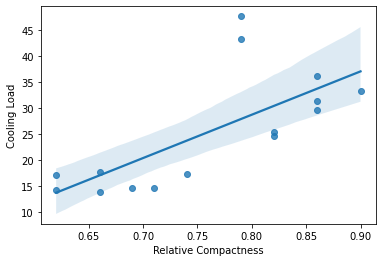

In [24]:
#regression plot
sns.regplot(x='Relative Compactness',
            y ='Cooling Load',
            data = simpleLinearRegressionDF)

Collinearity and assumptions for linear regression.
 1. Linearity - the relationship between the variables s linear such that a straight line is the best of fit.<br>

2. Homescedasticity - the residuals or prediction error are of equal or constance variance.<br>

3. Normality - the residuals are of a normal distribution.<br>

4. Independence of observations.<br>
In multiple linear regression where there are more predictors, it is assumed that the variables are independent of each other without any strong correlation between them.<br>

5. Residual sum of squares and minimizing the cost function.<br>
Cost function is a measure of the performance of a model - how far or close the predicted values are to the real values.<br> In linear regression, the cost function can be defined as the sum of squared errors in a training set.<br>

6. Gradient descent and coordinate descent algorithm.<br>
Gradient descent is an optimzation algorithm that mnimizes a cost function by specifying the direction to move towards to obtain a local or global minima.This is done by initially starting with random values then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen to determine the step size to be taken for each iteration. It is important to carefully select this parameter because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, it can result in an overshoot surpassing the location of the minimum cost.


# Multiple Linear Regression.

COLLINEARITY<br>
Correlation is a measure used to describe the linear relationship between two variables.<br>

Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together).<br>

A correlation value of 0 indicates that there is absolutely no correlation between both variables.<br>
<br>

MULTICOLLINEARITY<br>
A situation where two or more of the predictors have a strong correlation.<br>

Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable.<br>

POLYNOMIAL REGRESSION<BR>

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable.<BR>




#Measuring Regression Performance

How well a regression model performs can be obtained by how close the predicated value is to the ground truth.<br>

Evaluation metrics for performance:<br>
1. Mean Absolute Error (MAE) <br>
This is the sum of the average of the absolute error between the predicted values and true values.
The smaller the MAE the better the model.
If the MAE is 0, the model is perfect and accurately predicts the results which is almost impossible.

In [25]:
#Mean Absolute Error.

#scikit-learn /sklearn library for machine learning in python.
#First normalize our dataset to a common scale using min max scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns =df.columns)
features_df = normalised_df.drop(columns = ['Heating Load','Cooling Load'])
heating_target = normalised_df['Heating Load']

#Now we split our dataset into training and testing dataset.
#Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train,y_train)

#obtain the predictions
predicted_values =linear_model.predict(x_test)

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)


0.063

2. Residual Square of sums (RSS)

This metric explains the variance in the representation of the dataset. <br>
It measures how well  the model approximates the data.<br>
Residual error - This is the difference between the nth true value and the nth predicted value by the model.<br>
RSS is the sum of the square of errors between the residual model.

In [26]:
from sklearn.metrics import mean_squared_error
rss = np.sqrt(mean_absolute_error(y_test, predicted_values))
round(rss,3)

0.251

3. R-squared.
Also known as the coefficients of determination, r-squared is a metric used in regression to determine the goodness of fit of the model.<br>
With values ranging form 0 to1 , it ggives information on the percentage of the response variablle explained by the model.<br>
Mostly, the higher the value the better the model.

In [27]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score,3)

0.893

##Model complexity, Underfitting and Overfitting
Model complexity - number of input features used to train a model and the algorithimic learning complexity.<br><br>

An overly complex can be difficult to interpret, prone to overfitting and require more computing.<br><br>

An overfit model will perform well on the training data and poorly and on unseen data.<br>

While a model is required to learn the actual relationship of the variables in the training set, an overfit model learns the training set, fits the noise, outliers and irrelevant information, then makes predictions based on the noise.<br><br>

On the other hand, when a model is too simple (underfitting), it can be a result of having very few features not sufficient enough to learn details and relationships in the data.

### The Bias-Variance trade off
Bias is a measure of correctness of a model.<br><br>

While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships.<br><br>

Variance tells how much the values estimated by a model will vary across different training data<br>

Required - low bias & low variance

# Penalization Methods.

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model.<br>
Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . <br>
There are two types of regression techniques such as Ridge and Lasso regression



### Ridge regression
L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them.<br>

The shrinkage prevents overfitting caused by the complexity of the model or  collinearity.<br>

In [28]:
#L2 regularisation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
print(ridge_reg.fit(x_train, y_train))


Ridge(alpha=0.5)


### Feature selection and lasso regression.

Feature selection<br>
Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection.

Lasso regression(L2 regularisation)

Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors.


Elastic Net Regression<br>
A combination of the L1 and L2 penalties from ridge and also lasso regression.

In [29]:
#Lasso regression /L2 regularisation
from sklearn.linear_model import Lasso
lasso_reg = Lasso (alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [41]:
#Comparing the effects of regularisation

#this function returns the weight of every feature
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df =pd.DataFrame(weights).reset_index()
  weights_df.columns =['Features,col_name']
  weight_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')

ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')






NameError: ignored

# Non- Linear Rergession methods and Other Recommendations

Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model.

<br>
Hyperparameters<br>
The parameters that define the model architecture.
Hyperparameter tuning - process of exploring range of values.<br>

<br>
Model parameters<br>
These are parameters that are learnt during the training phase while setting the hyperparameters.<br>

Grid search and random search are two common strategies for tuning hyperparameters.<br>

<br>
Grid Search

Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

<br>
Random Search

As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.



# Learning Model Building in Sckikit-Learn: A python machine learning library
<br>
Components of a dataset.

1. Features (predictors, inputs or attributes.)
They can be more than one and hence represented by a feature matrix.
x is a common notation to represent feature matrix.
A list of all the features  is named as feature names.

2. Response (target, label, output).
x is a common notation to represent a response vector.
All the possible values taken by a response vector are termed target names.

In [42]:
#Loading exemplar datasets
#Exemplar dataset - scikit-learn loaded datasets.

#load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

#store the feature matrix (X) and response vector 9y)
X =iris.data
y =iris.target

#store the feature and target names
feature_names = iris.feature_names
target_names = iris.target_names

#printing features and target names of our dataset
print("Feature names:",feature_names)
print("Target names:",target_names)
#X and y are numpy arrays
print("\n Type of X is: ", type(X))

#printing first 5 input rows
print("\n First 5 rows of X:\n",X[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

 Type of X is:  <class 'numpy.ndarray'>

 First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [43]:
#Splitting the dataset.
# One important aspect of all machine learning models is to determinr their accuracy.
# In order to determine their accuracy, one can train the model using the given dataset and predict the response values for the same dataset using the model hence find the accuracy of the model.

#load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

#store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

#splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

#printing the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

#printing the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)


(90, 4)
(60, 4)
(90,)
(60,)


X, y - they are the feature matrix and response vector which need to be split.

test_size -ratio of test data to the given data. Example setting test size = 0.4 for 150 rows of X produces test data of 150 * 0.4 = 60 rows

random state - f you use random_state = some_number, then you can guarantee that your split will be always the same. This is useful if you want reproducible results, for example in testing for consistency in the documentation (so that everybody can see the same numbers).

In [ ]:
#Training the model


# Regression and Classification | Supervised Machine Learning

<br>
What is regression and classification in ML
<br>
At a high level, these different algorithms can be classified into two groups based on the way they “learn” about data to make predictions: supervised and unsupervised learning.

<br>
Supervised ML - Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output Y = f(X) .

<br>
Techniques of Supervised Machine Learning algorithms include linear and logistic regression, multi-class classification, Decision Trees and support vector machines.



##### Simple linear regression of a housing dataset.

In [44]:
#regression using data set
import matplotlib 
matplotlib.use('GTK3Agg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

#load CSV
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


In [45]:
#Load CSV and columns
df =pd.read_csv("Housing.csv")

X = df['lotsize']
y =df['price']

X = X.values.reshape(len(X),1)
y = y.values.reshape(len(X),1)

#Split the data into training and testing test
X_train = X[:-250]
X_test = X[-250:]

#Splot the targets into training/testing sets
y_train = y[:-250]
y_test = y[-250:]



([], <a list of 0 Text major ticklabel objects>)

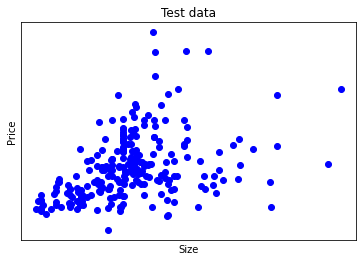

In [48]:
#plotting the outputs
plt.scatter(X_test, y_test, color ='blue')
plt.title('Test data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

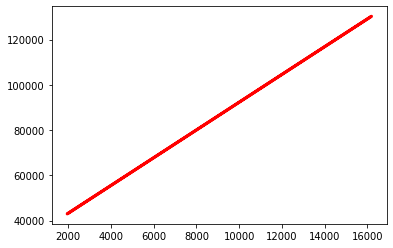

In [47]:
#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model using the training sets
regr.fit(X_train,y_train)

#plot outputs
plt.plot(X_test,regr.predict(X_test),color ='red',linewidth=3)
plt.show()

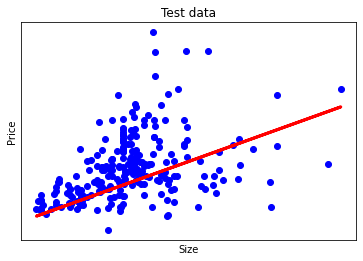

In [49]:
#plotting the outputs
plt.scatter(X_test, y_test, color ='blue')
plt.title('Test data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model using the training sets
regr.fit(X_train,y_train)

#plot outputs
plt.plot(X_test,regr.predict(X_test),color ='red',linewidth=3)
plt.show()

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()